# Aufgabe 2 

Die Bewegungsgleichung einer vertikal steigenden Rakete lässt sich als DGL 2. Ordnung vereinfacht schreiben als: 

$$
a(t) = \ddot{h}(t) = v_{rel} \cdot \frac{\mu}{m_A - \mu \cdot t} - g
$$

Dabei ist $a(t)$ wieder die Beschleunigung der Rakete, wobei wir die Ortskoordinate hier als $h(t)$ bezeichnen (Höhe über Meer in Metern), $v_{rel}$ ist die relative Ausströmgeschwindigkeit des Treibsstoffs, $\mu = \frac{d_m}{d_t}$ ist der Massenstrom (der beschreibt, wieviel Treibstoffmasse pro Zeiteinheit ausgestossen wird), $m_a$ ist die Anfangsmasse der Rakete zu Beginn der Brennphase und $g = 9.81\frac{m}{s^2}$ die Fallbeschleunigung

Wir nehmen an, dass $g$ und die Ausströmgeschwindigkeit $v_rel$ des Treibsstoffs während der gesamten Brennphase
der Triebwerke konstant sind, der gesamte Treibstoff in der Brennphase $0 \leq t \leq t_E$ ausgestossen wird ($t_E$ bedeutet
hier also das Ende der Brennphase) und der Massenstrom $\mu = \frac{d_M}{d_t}$ ebenfalls während der gesamten Brennphase
der Triebwerke konstant ist mit

$$
\mu = \frac{dm}{dt} = \frac{m_A - m_E}{t_E}
$$

wobei $m_E$ die Masse der Rakete am Ende der Brennphase darstellt.

Für die Brennphase der ersten Stufe der dreistufigen Ariane 4 Rakete galt z.B. $v_{rel} = 2600 \frac{m}{s}, m_A = 300'000 \text{kg}, m_E = 80'000 \text{kg}, t_E = 190 \text{s}$. Erstellen Sie ein Skript `WIN07_S10_Aufg2.py`, welches Ihnen die folgenden Aufgaben löst:


#### a)

Plotten Sie $a(t)$ für $t \in [0, t_E]$ und berechnen Sie numerisch mit der summierten Trapez-Regel mit Ihrer Funktion
aus Serie 8 (Aufgabe 3a) mit einer ausreichend kleinen Schrittweite die Geschwindigkeit

$$
v(t) = \int_{0}^{t}a(t) \ dt
$$

und die Höhe

$$
h(t) = \int_{0}^{t}v(t) \ dt
$$

Plotten Sie $v(t)$ und $h(t)$ in zwei separate Grafiken. Wie schnell und wie hoch ist die Rakete am Ende der ersten
Brennphase, mit wievielen $g$ beschleunigt sie zu dem Zeitpunkt?


#### b) 

Vergleichen Sie Ihre Lösung schliesslich grafisch mit den analytischen Lösungen

$$
v(t) = v_{rel} \cdot \ln\left(\frac{m_A}{m_A - \mu \cdot t}\right) - gt
$$

$$
h(t) = - \frac{v_{rel}(m_A - \mu t)}{\mu} \cdot \ln \left(\frac{m_A}{m_A - \mu \cdot t} \right) + v_{rel} \cdot t - \frac{1}{2}gt^2
$$

indem Sie diese in die jeweils gleiche Grafik plotten.

Die Aufgaben a und b werden aufgrund der benötigten Plots jeweils parallel gelöst

In [126]:
#Definition der Konstanten der Funktion

g = 9.81 # Erdbeschleunigung [m/s^2]
m_A = 300_000 # Anfangsmasse der Rakete [kg]
m_E = 80_000 # Endmasse der Rakete [kg]
t_0 = 0 # Startwert der Zeit [s]
t_E = 190 # Endwert der Zeit [s]
v_rel = 2600 # Austrittsgeschwindigkeit Treibstoff [m/s]

mu = (m_A - m_E) / t_E # Massenstrom [kg/s]

#Schrittweite der summierten Trapezmethode (bestimmt numerische Genauigkeit):
number_of_steps = 10 #Schrittweite der Trapezmethode

a = lambda t: v_rel * mu / (m_A - mu * t) - g

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

def summierteTrapezMethode(f, a, b, n: int):
    """
    f: Funktion, welche integriert werden soll
    a: Unterer Grenzwert
    b: Oberer Grenzwert
    n: Anzahl Stützstellen
    """
    h = (b - a) / n # Abstand zwischen zwei Stützstellen
    support = np.linspace(a + h, b, n)[:-1]
    sum_trapez = np.array([f(x) for x in support]).sum()
    return h * (sum_trapez + ((f(a) + f(b))/2))

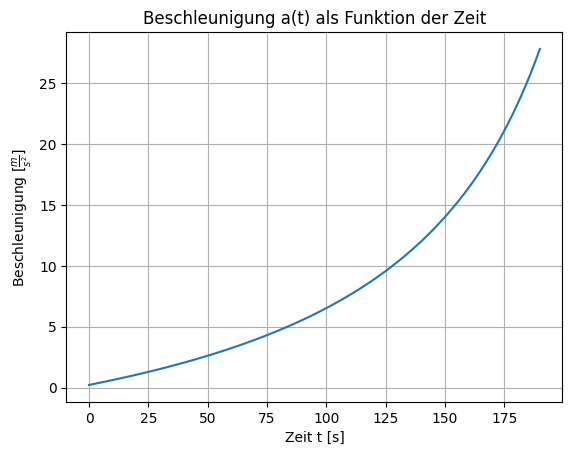

In [128]:
# a)

# Plot der Beschleunigung als Funktion der Zeit

time = np.linspace(t_0, t_E, 100) # Zeitintervall
plt.plot(time, a(time))
plt.title("Beschleunigung a(t) als Funktion der Zeit")
plt.xlabel("Zeit t [s]")
plt.ylabel(r"Beschleunigung $[\frac{m}{s^2}]$")
plt.grid()
plt.show()

In [129]:
# a)

# Vergleich der Raketenbeschleunigung im Verhältnis zur Erdbeschleunigung

acceleration_in_g = a(time[-1]) / g
display(md(f" ##### Die Endbeschleunigung der Rakete entspricht dem {acceleration_in_g}-fachen der Erdbeschleunigung"))

 ##### Die Endbeschleunigung der Rakete entspricht dem 2.8360427061537634-fachen der Erdbeschleunigung

In [130]:
# a)
#Numerische Berechnung des Integrals mithilfe der summierte Trapezmethode

v_numerical = np.array([])
for idx in range(1, len(time)):
    v_numerical = np.append(v_numerical, summierteTrapezMethode(a, time[0], time[idx], number_of_steps))

# b)
# Analytische Berechnung des Integrals

v_a = lambda t: v_rel * np.log(m_A / (m_A - mu * t )) - g * t
v_analytical = v_a(time[1:])

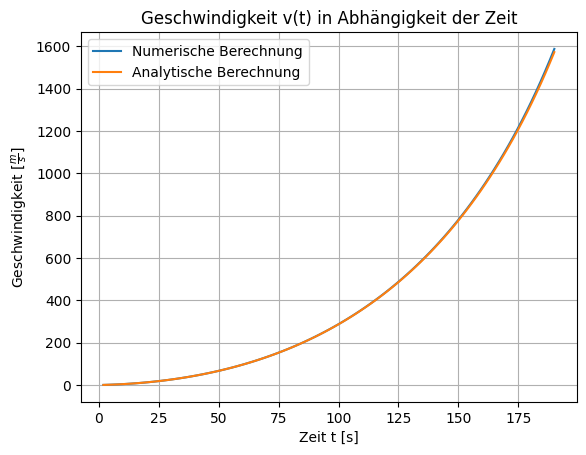

In [131]:
# a) + b)

#Plot der numerisch berechneten Geschwindigkeit und der analytisch berechneten Geschwindigkeit

time_plot = time[1:]

plt.title("Geschwindigkeit v(t) in Abhängigkeit der Zeit")
plt.plot(time_plot, v_numerical, label="Numerische Berechnung")
plt.plot(time_plot, v_analytical, label="Analytische Berechnung")
plt.xlabel("Zeit t [s]")
plt.ylabel(r"Geschwindigkeit $[\frac{m}{s}]$")
plt.grid()
plt.legend()
plt.show()

In [132]:
# Numerische Berechnung Höhe

h_numerical = np.array([0]) #Startposition
for idx in range(1, len(v_numerical)):
    v_avg = (1 / 2) * (v_numerical[idx-1] + v_numerical[idx])
    h = h_numerical[-1] + v_avg * (time[idx] - time[idx-1])
    h_numerical = np.append(h_numerical, h)

# Analytische Berechnung Höhe

h_t = lambda t: -((v_rel * (m_A - mu * t)) / mu) * np.log(m_A / (m_A - mu * t)) + v_rel * t - (1/2) * g * t**2
h_analytical = h_t(time[1:])


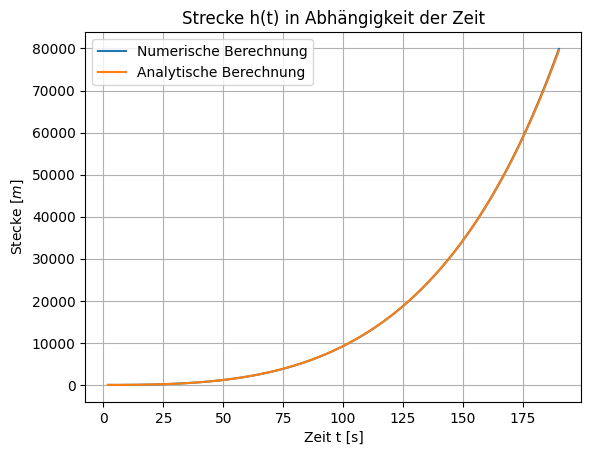

In [133]:
# a) + b)

#Plot der numerisch berechneten Strecke und der analytisch berechneten Strecke

time_plot = time[1:]

plt.title("Strecke h(t) in Abhängigkeit der Zeit")
plt.plot(time_plot, h_numerical, label="Numerische Berechnung")
plt.plot(time_plot, h_analytical, label="Analytische Berechnung")
plt.xlabel("Zeit t [s]")
plt.ylabel(r"Stecke $[m]$")
plt.grid()
plt.legend()
plt.show()

In [134]:
# Maximale Geschwindigkeiten: 

v_max_numerical = v_numerical[-1]
v_max_analytical = v_analytical[-1]

display(md(f"""Die höchste Geschwindigkeit numerisch berechnet beträgt {v_max_numerical} $\\frac{{m}}{{s}}$"""))
display(md(f"""Die höchste Geschwindigkeit analytisch berechnet beträgt {v_max_analytical} $\\frac{{m}}{{s}}$"""))

Die höchste Geschwindigkeit numerisch berechnet beträgt 1587.7662744950294 $\frac{m}{s}$

Die höchste Geschwindigkeit analytisch berechnet beträgt 1572.6651839540305 $\frac{m}{s}$

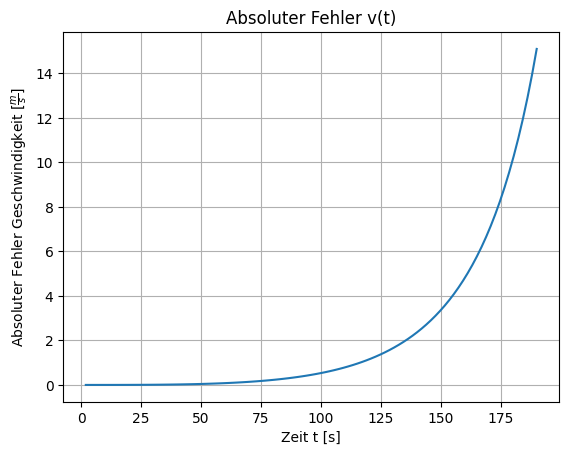

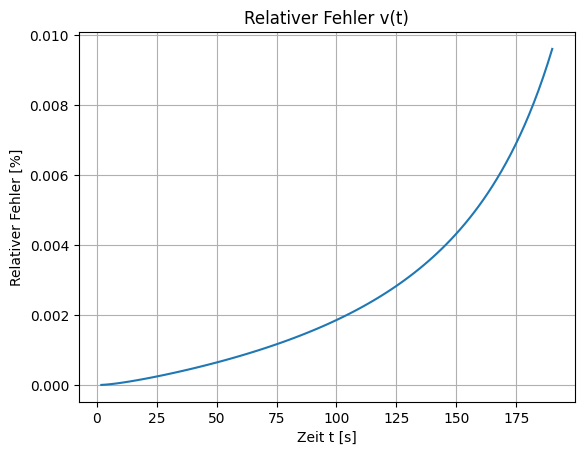

In [135]:
# Absoluter Fehler Geschwindigkeitsberechnung

# a) + b)

time_plot = time[1:]

plt.title("Absoluter Fehler v(t)")
plt.plot(time_plot, np.abs(v_numerical - v_analytical))
plt.xlabel("Zeit t [s]")
plt.ylabel(r"Absoluter Fehler Geschwindigkeit $[\frac{m}{s}]$")
plt.grid()
plt.show()

# Relativer Fehler Geschwindigkeitsberechnung

plt.title("Relativer Fehler v(t)")
plt.plot(time_plot, np.abs((v_numerical - v_analytical)/ v_analytical))
plt.xlabel("Zeit t [s]")
plt.ylabel(r"Relativer Fehler [%]")
plt.grid()
plt.show()



In [136]:
# Maximale zurückgelegte Strecken

h_max_numerical = h_numerical[-1]
h_max_analytical = h_analytical[-1]

display(md(f""" ##### Die maximale zurückgelegte Strecke numerisch berechnet beträgt {h_max_numerical} $\\frac{{m}}{{s}}$"""))
display(md(f"""##### Die maximale zurückgelegte Strecke analytisch berechnet beträgt {h_max_analytical} $\\frac{{m}}{{s}}$"""))

 ##### Die maximale zurückgelegte Strecke numerisch berechnet beträgt 79898.25708405075 $\frac{m}{s}$

##### Die maximale zurückgelegte Strecke analytisch berechnet beträgt 79494.08729044878 $\frac{m}{s}$

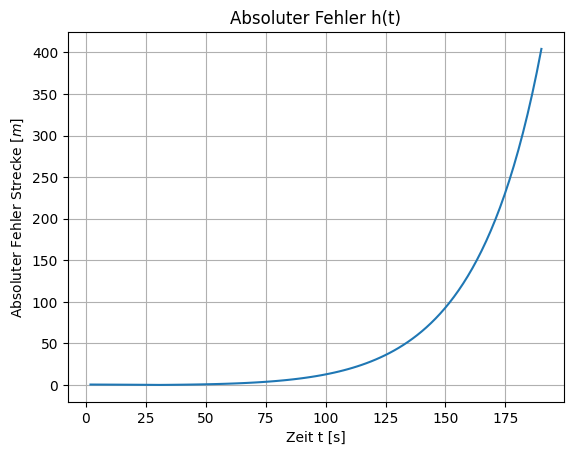

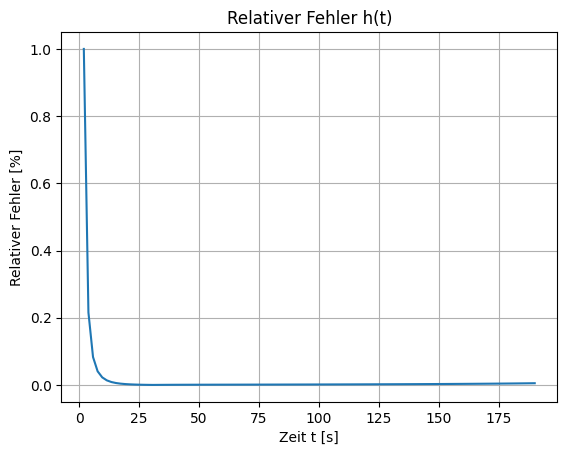

In [137]:
# Absoluter Fehler Streckenberechnung

# a) + b)

time_plot = time[1:]

plt.title("Absoluter Fehler h(t)")
plt.plot(time_plot, np.abs(h_numerical - h_analytical))
plt.xlabel("Zeit t [s]")
plt.ylabel(r"Absoluter Fehler Strecke $[m]$")
plt.grid()
plt.show()

# Relativer Fehler Streckenberechnung

plt.title("Relativer Fehler h(t)")
plt.plot(time_plot, np.abs((h_numerical - h_analytical)/ h_analytical))
plt.xlabel("Zeit t [s]")
plt.ylabel(r"Relativer Fehler [%]")
plt.grid()
plt.show()

